In [1]:
# This script visualizes the output of a gaze interval query

# The purpose of gaze interval queries is to determine whether each particiant is looking at one of the other participants, 
# looking away, or transitioning between one of the other states

In [37]:
import re
import matplotlib.pyplot as plt

In [9]:
#define location of data to visualize

data_dir="C:/Users/gary4/Documents/repos/Recording-And-Analysis-Plugin/Data/group0"
file_name="aplausemr_group0_date20240708_10_42_trial0_experimentcontroller_interval_requests_results.csv"

file_path = data_dir + "/" + file_name

In [26]:
# define some data structures for reading data

class Interval:
    def __init__(self, start, end):
        self.start = start
        self.end = end
    def str(self):
        return str(self.start) + "," + str(self.end)
        
class GazeIntervalResults:
    def __init__(self, desc):
        self.intervals = []
        
        # find participant numbers for gazer and gaze target
        participant_label_ends = [m.end() for m in re.finditer('Participant', desc)]
        self.gazer = desc[participant_label_ends[0]]
        self.gaze_target = desc[participant_label_ends[1]]
        
    def add_interval(self,start,end):
        self.intervals.append(Interval(start,end))
        
    def print_intervals(self):
        for i in self.intervals:
            print(i.str())

In [39]:
# read data into structures

results = []

f = open(file_path, "r")

while True:
    line = f.readline()
    if not line:
        break

    if line.startswith("AnalysisQuery"):
        results.append(GazeIntervalResults(line))
    elif line.startswith('StartTime') or not line.strip():
        pass
    else:
        interval = line.split(',')
        results[-1].add_interval(float(interval[0]), float(interval[1]))
f.close()


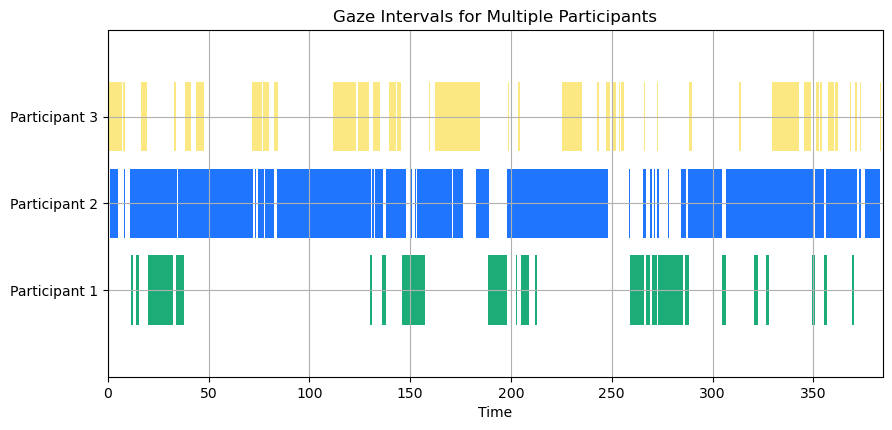

In [54]:
cols = ['#EE204D', '#1CAC78', '#1F75FE', '#FCE883']

# Function to visualize multiple GazeIntervalResults
def plot_multiple_gaze_results(results_list):
    fig, ax = plt.subplots(figsize=(10, len(results_list) * 1.5))
    
    # Plot each GazeIntervalResults on a different line
    for idx, results in enumerate(results_list):
        for interval in results.intervals:
            ax.broken_barh([(interval.start, interval.end - interval.start)], (idx - 0.4, 0.8), facecolors=cols[int(results.gaze_target)])
#         ax.text(0, idx, f"Gazer: {results.gazer}, Target: {results.gaze_target}", va='center', ha='right')
    
    y_labels = []
    for results in results_list:
        y_labels.append("Participant " + str(results.gaze_target))
    
    # Customize the plot
    ax.set_ylim(-1, len(results_list))
    ax.set_xlim(0, max(interval.end for results in results_list for interval in results.intervals) + 1)
    ax.set_xlabel('Time')
    ax.set_yticks(range(len(results_list)))
    ax.set_yticklabels(y_labels)
    ax.grid(True)
    
    plt.title("Gaze Intervals for Multiple Participants")
    plt.show()
    
plot_multiple_gaze_results(results)